
## Join With Patitioning and Non-Partitioning

In [0]:
from pyspark.sql.functions import *
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
!ls dbfs:/FileStore/

ls: cannot access 'dbfs:/FileStore/': No such file or directory


In [0]:
customer_path = "/FileStore/tables/AdventureWorks_Customers.csv"

customer_df = spark.read.format(".csv")\
                    .option("inferSchema","true")\
                    .option("header","true")\
                    .csv(customer_path)

In [0]:
customer_df.show()

+-----------+------+---------+--------+----------+-------------+------+--------------------+------------+-------------+---------------+--------------+---------+
|CustomerKey|Prefix|FirstName|LastName| BirthDate|MaritalStatus|Gender|        EmailAddress|AnnualIncome|TotalChildren| EducationLevel|    Occupation|HomeOwner|
+-----------+------+---------+--------+----------+-------------+------+--------------------+------------+-------------+---------------+--------------+---------+
|      11000|   MR.|      JON|    YANG|1966-04-08|            M|     M|jon24@adventure-w...|    $90,000 |            2|      Bachelors|  Professional|        Y|
|      11001|   MR.|   EUGENE|   HUANG|1965-05-14|            S|     M|eugene10@adventur...|    $60,000 |            3|      Bachelors|  Professional|        N|
|      11002|   MR.|    RUBEN|  TORRES|1965-08-12|            M|     M|ruben35@adventure...|    $60,000 |            3|      Bachelors|  Professional|        Y|
|      11003|   MS.|  CHRISTY|    

In [0]:
sales_path = "/FileStore/tables/AdventureWorks_Sales_2016.csv"

sales_df = spark.read.format(".csv")\
                    .option("inferSchema","true")\
                    .option("header", "true")\
                    .csv(sales_path)

In [0]:
sales_df.show()

+----------+----------+-----------+----------+-----------+------------+-------------+-------------+
| OrderDate| StockDate|OrderNumber|ProductKey|CustomerKey|TerritoryKey|OrderLineItem|OrderQuantity|
+----------+----------+-----------+----------+-----------+------------+-------------+-------------+
|2016-01-01|2002-10-17|    SO48797|       385|      14335|           1|            1|            1|
|2016-01-01|2002-09-30|    SO48802|       383|      24923|           9|            1|            1|
|2016-01-01|2002-11-29|    SO48801|       326|      15493|           1|            1|            1|
|2016-01-01|2002-11-16|    SO48799|       352|      26708|           4|            1|            1|
|2016-01-01|2002-12-16|    SO48798|       369|      23332|           9|            1|            1|
|2016-01-01|2002-12-02|    SO48800|       342|      15491|           5|            1|            1|
|2016-01-01|2002-10-19|    SO48795|       375|      16538|           8|            1|            1|


In [0]:
sales_partitioned_df = sales_df.repartition("CustomerKey")
sales_partitioned_df.show()

+----------+----------+-----------+----------+-----------+------------+-------------+-------------+
| OrderDate| StockDate|OrderNumber|ProductKey|CustomerKey|TerritoryKey|OrderLineItem|OrderQuantity|
+----------+----------+-----------+----------+-----------+------------+-------------+-------------+
|2016-01-01|2002-11-16|    SO48799|       352|      26708|           4|            1|            1|
|2016-01-07|2002-12-14|    SO48840|       369|      17753|          10|            1|            1|
|2016-02-17|2003-01-30|    SO49338|       369|      23571|           9|            1|            1|
|2016-04-12|2003-03-07|    SO50010|       369|      24171|           9|            1|            1|
|2016-06-14|2003-05-07|    SO50914|       342|      27484|           9|            1|            1|
|2016-06-15|2003-03-10|    SO50925|       356|      15790|           9|            1|            1|
|2016-06-26|2003-03-09|    SO51033|       358|      16339|           9|            1|            1|



## Measure the time for each type of join method

In [0]:
non_partition_time = []
n = 50

for i in range(n):
    start = time.time()
    join_df = customer_df.join(sales_df, customer_df.CustomerKey==sales_df.CustomerKey,"left")
    end = time.time()
    non_partition_time.append(end - start)

In [0]:
partition_time = []

for i in range(n):
    start = time.time()
    join_df = customer_df.join(sales_partitioned_df, customer_df.CustomerKey==sales_partitioned_df.CustomerKey,"left")
    end = time.time()
    partition_time.append(end - start)

In [0]:
time_df = pd.DataFrame({'partition_time':partition_time, 'non_partition_time':non_partition_time})
display(time_df.round(7))

partition_time,non_partition_time
0.0223541,0.0137799
0.0216763,0.0134599
0.0174689,0.0140827
0.0240414,0.0115705
0.0336063,0.0124309
0.0208554,0.0113425
0.0173583,0.1465445
0.0253046,0.0161097
0.0165706,0.012363
0.0118749,0.014621


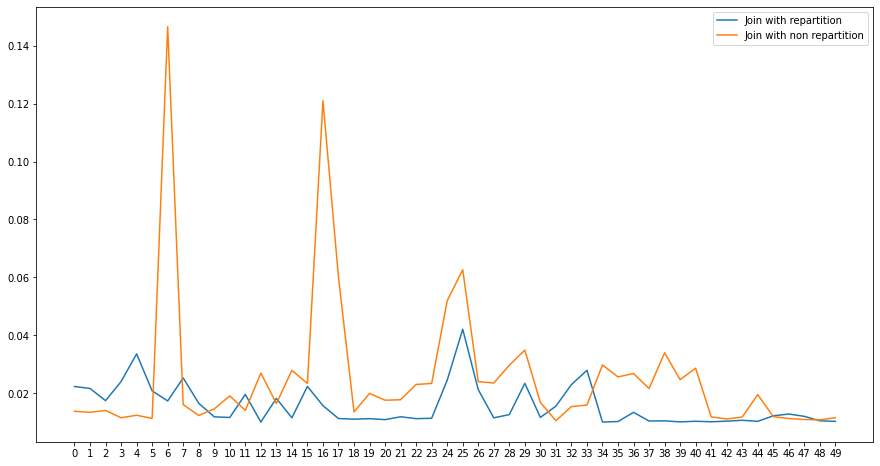

In [0]:
plt.figure(figsize=(15,8))

plt.plot(time_df.index.map(str), time_df.partition_time, label="Join with repartition")
plt.plot(time_df.index, time_df.non_partition_time, label="Join with non repartition")
plt.legend()
plt.show()

In [0]:
# Trung binh thoi gian
display(np.mean(time_df, axis=0))

partition_time        0.015760
non_partition_time    0.025573
dtype: float64

Out[131]: <AxesSubplot:>

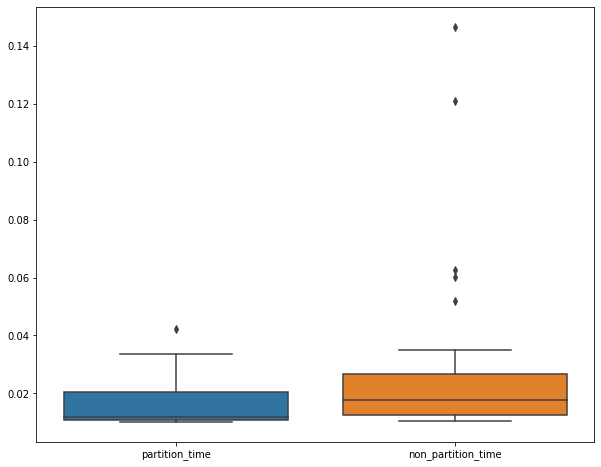

In [0]:
plt.figure(figsize=(10,8))
sns.boxplot(data=time_df)


Thời gian trung bình của join khi có shuffle ít hơn hẳn so với không có shuffle

Việc chia partition có thể ảnh hưởng đến tốc độ của transformation (nếu transformation xảy ra shuffle). Điều này có thể nằm trong cơ chế của shuffle, mỗi khi xảy ra sẽ tổ chức lại các dòng có cùng giá trị dữ liệu vào trong cùng một partition. Do đó, repartion trước có thể giúp giảm thời gian của shuffle